# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Trio Anggoro]
- **Email:** [trioanggoro12345@gmail.com]
- **ID Dicoding:** [MC427D5Y0300]

## Menentukan Pertanyaan Bisnis

- Kota manakah yang memiliki pelanggan terbanyak?
- Negara Bagian manakah yang memiliki pelanggan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

Membaca dataset dan manampilkan 5 data

In [120]:
df = pd.read_csv('Data\customers_dataset.csv')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Dibagian gathering data saya membaca dataset dan menampilkan lima data.
- xxx

### Assessing Data

Menampilkan informasi dataset

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Menampilkan jumlah data missing atau NaN

In [122]:
df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Menampilkan jumlah data duplicate

In [123]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan distribusi dan karakteristik data numerik dalam dataset.

In [124]:
df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**<br>
Dibagian Assesing data saya menampilkan
- informasi dataset
- jumlah data missing
- jumlah data duplicate
- distribusi dan karakteristik data numerik dalam dataset

### Cleaning Data

Menghapus kolom yang tidak digunakan

In [125]:
df.drop(columns=['customer_id', 'customer_unique_id', 'customer_zip_code_prefix'], inplace=True)
df.head()

,customer_city,customer_state
0,franca,SP
1,sao bernardo do campo,SP
2,sao paulo,SP
3,mogi das cruzes,SP
4,campinas,SP


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_city   99441 non-null  object
 1   customer_state  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


### **Insight:**
### Tidak ada cleaning data karena tidak ada data missing dan duplicate

## Exploratory Data Analysis (EDA)

### Explore ...

Menampilkan ringkasan statistik dari semua jenis data dalam DataFrame, baik numerik maupun kategorikal.

In [127]:
df.describe(include="all")

,customer_city,customer_state
count,99441,99441
unique,4119,27
top,sao paulo,SP
freq,15540,41746


Hitung jumlah pelanggan per kota

In [128]:
# Hitung jumlah pelanggan per kota
city_distribution = df['customer_city'].value_counts().reset_index()
city_distribution.columns = ['customer_city', 'count']
city_distribution.head()

,customer_city,count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


Hitung jumlah pelanggan per negara bagian

In [129]:
# Hitung jumlah pelanggan per negara bagian
state_distribution = df['customer_state'].value_counts().reset_index()
state_distribution.columns = ['customer_state', 'count']
state_distribution.head()

,customer_state,count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


**Insight:**
- dibagian EDA saya menghitung jumlah pelanggan per kota dan jumlah pelanggan per negara bagian<br>
tujuannya untuk mengetahui jumlah pelanggan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota manakah yang memiliki pelanggan terbanyak?

- Menampilkan Kota dengan jumlah pelanggan terbanyak

In [130]:
# Kota dengan jumlah pelanggan terbanyak
most_populous_city = city_distribution.iloc[0]
print(f"City with the most customers: {most_populous_city['customer_city']} ({most_populous_city['count']} customers)")

City with the most customers: sao paulo (15540 customers)


- Menampilkan 10 kota dengan pelanggan terbanyak

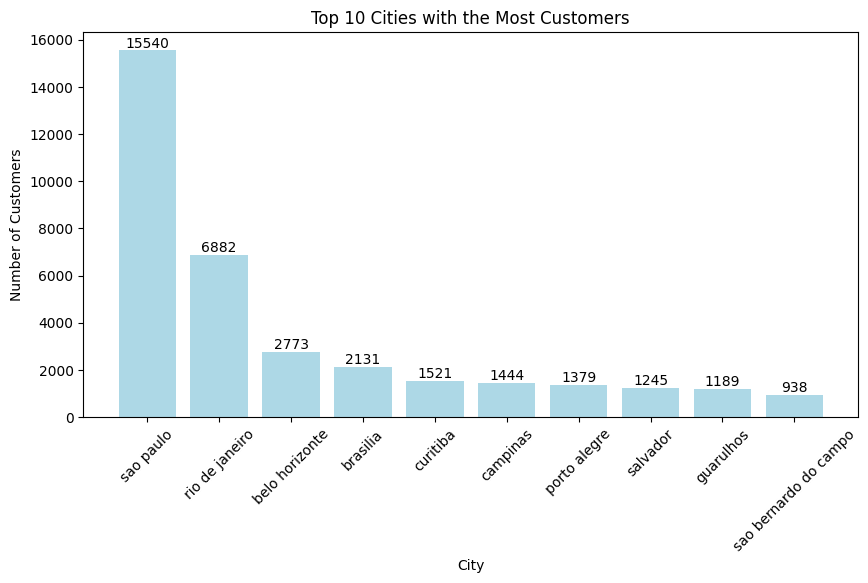

In [131]:
# Visualisasi 10 kota dengan pelanggan terbanyak
plt.figure(figsize=(10,5))
bars = plt.bar(city_distribution['customer_city'][:10], city_distribution['count'][:10], color='lightblue')
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.title("Top 10 Cities with the Most Customers")
plt.xticks(rotation=45)

# Menambahkan jumlah pelanggan di atas tiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.show()

### Pertanyaan 2: Negara bagian manakah yang memiliki jumlah pelanggan terbanyak?

- Menampilkan Negara Bagian dengan jumlah pelanggan terbanyak

In [132]:
# Negara bagian dengan jumlah pelanggan terbanyak
most_populous_state = state_distribution.iloc[0]
print(f"State with the most customers: {most_populous_state['customer_state']} ({most_populous_state['count']} customers)")


State with the most customers: SP (41746 customers)


Menampilkan 10 negara bagian dengan pelanggan terbanyak

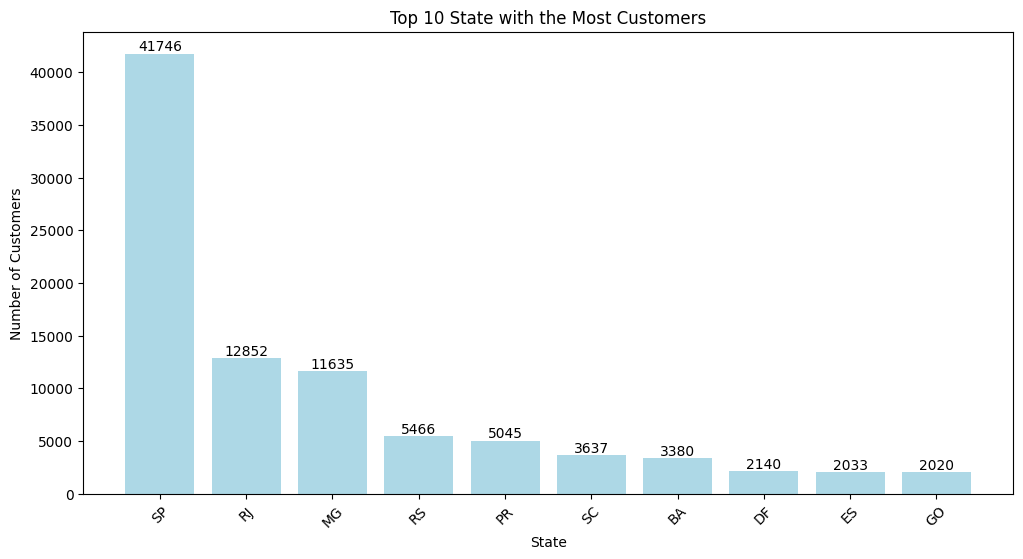

In [133]:
# Visualisasi 10 negara bagian dengan pelanggan terbanyak
plt.figure(figsize=(12,6))
bars = plt.bar(state_distribution['customer_state'][:10], state_distribution['count'][:10], color='lightblue')
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.title("Top 10 State with the Most Customers")
plt.xticks(rotation=45)

# Menambahkan jumlah pelanggan di atas tiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.show()

**Insight:**
- Pada pertanyaan 1 saya ingin menampilkan kota mana yang memiliki pelanggan terbanyak dan hasilnya kota sao paulo memiliki pelanggan terbanyak.
- Pada pertanyaan 2 saya ingin menampilkan negara bagian mana yang memiliki pelanggan terbanyak dan hasilnya negara bagian SP memiliki pelanggan terbanyak. 

## Analisis Lanjutan (Opsional)

Clustering dengan teknik Binning untuk kota berdasarkan pelanggan dengan class Low, Medium dan High 

In [134]:
# Menghitung jumlah jenis (unik) customer_city
unique_cities = df['customer_city'].nunique()
print(f"Total Customer Cities: {unique_cities}")

Total Customer Cities: 4119


In [135]:
# Clustering dengan teknik Binning untuk kota
bin_edges = np.linspace(city_distribution['count'].min(), city_distribution['count'].max(), num=4)
labels = ['Low', 'Medium', 'High']
city_distribution['bin_category'] = pd.cut(city_distribution['count'], bins=bin_edges, labels=labels, include_lowest=True)

Menampilkan hasil clustering dengan Binning

In [136]:
top_cities = city_distribution.head(10).copy()

# Menampilkan hasil clustering dengan Binning
top_cities['bin_category'] = pd.cut(top_cities['count'], bins=bin_edges, labels=labels, include_lowest=True)

print("Top 10 Cities with Binning Category:")
print(top_cities)


Top 10 Cities with Binning Category:
           customer_city  count bin_category
0              sao paulo  15540         High
1         rio de janeiro   6882       Medium
2         belo horizonte   2773          Low
3               brasilia   2131          Low
4               curitiba   1521          Low
5               campinas   1444          Low
6           porto alegre   1379          Low
7               salvador   1245          Low
8              guarulhos   1189          Low
9  sao bernardo do campo    938          Low


Menampilkan 10 kota teratas berdasarkan binning kategori

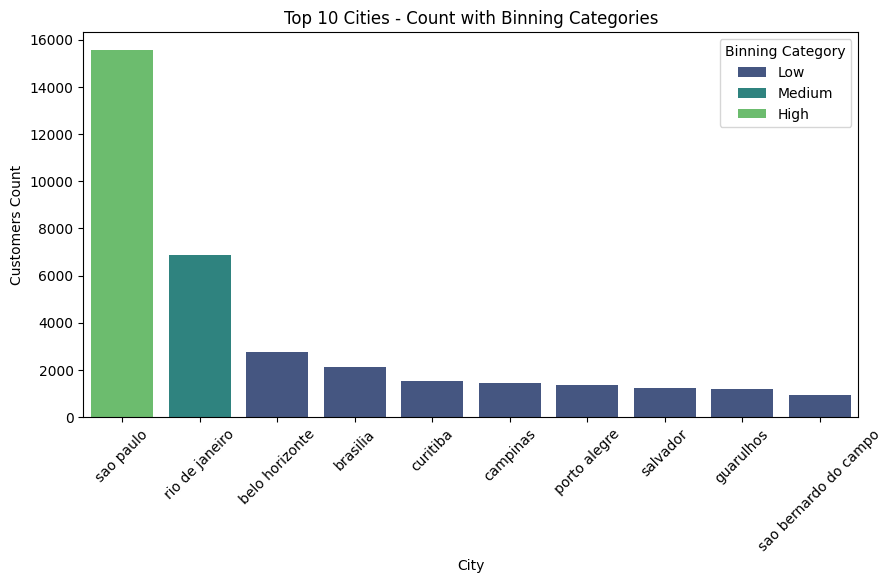

In [142]:
# Mengambil top 10 data dan reset index
top_cities = city_distribution.head(10).copy().reset_index(drop=True)

# Plot hasil clustering
plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_city",
    y="count",
    hue="bin_category",
    data=top_cities,
    palette="viridis"
)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Customers Count")
plt.title("Top 10 Cities - Count with Binning Categories")

# Menampilkan plot
plt.legend(title="Binning Category")
plt.show()


Visualisasi distribusi pelanggan berdasarkan binning kategori kota

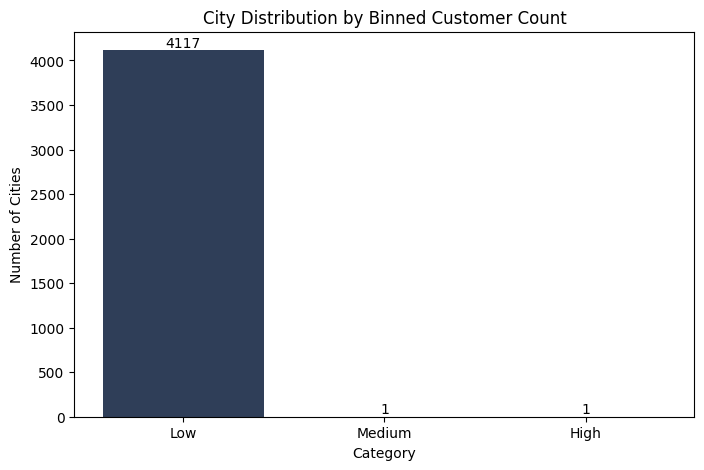

In [137]:
# Visualisasi distribusi pelanggan berdasarkan binning kategori kota
bin_counts = city_distribution['bin_category'].value_counts().sort_index()
plt.figure(figsize=(8,5))
bars = plt.bar(bin_counts.index, bin_counts.values, color=["#2F3E58", "#008080", "lightgreen"])
plt.xlabel("Category")
plt.ylabel("Number of Cities")
plt.title("City Distribution by Binned Customer Count")

# Menambahkan jumlah data di atas tiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom', fontsize=10)

plt.show()

Clustering dengan teknik Binning untuk Negara Bagian berdasarkan pelanggan dengan class Low, Medium dan High

In [138]:
# Menghitung jumlah jenis (unik) customer_state
unique_state = df['customer_state'].nunique()
print(f"Total Customer State: {unique_state}")

Total Customer State: 27


In [139]:
# Clustering dengan teknik Binning untuk negara bagian
bin_edges_state = np.linspace(state_distribution['count'].min(), state_distribution['count'].max(), num=4)
state_distribution['bin_category'] = pd.cut(state_distribution['count'], bins=bin_edges_state, labels=labels, include_lowest=True)

Menampilkan hasil clustering dengan Binning

In [140]:
top_State = state_distribution.head(10).copy()

# Menampilkan hasil clustering dengan Binning
top_State['bin_category'] = pd.cut(top_State['count'], bins=bin_edges_state, labels=labels, include_lowest=True)

print("Top 10 State with Binning Category:")
print(top_State)


Top 10 State with Binning Category:
  customer_state  count bin_category
0             SP  41746         High
1             RJ  12852          Low
2             MG  11635          Low
3             RS   5466          Low
4             PR   5045          Low
5             SC   3637          Low
6             BA   3380          Low
7             DF   2140          Low
8             ES   2033          Low
9             GO   2020          Low


Menampilkan 10 kota teratas berdasarkan binning kategori

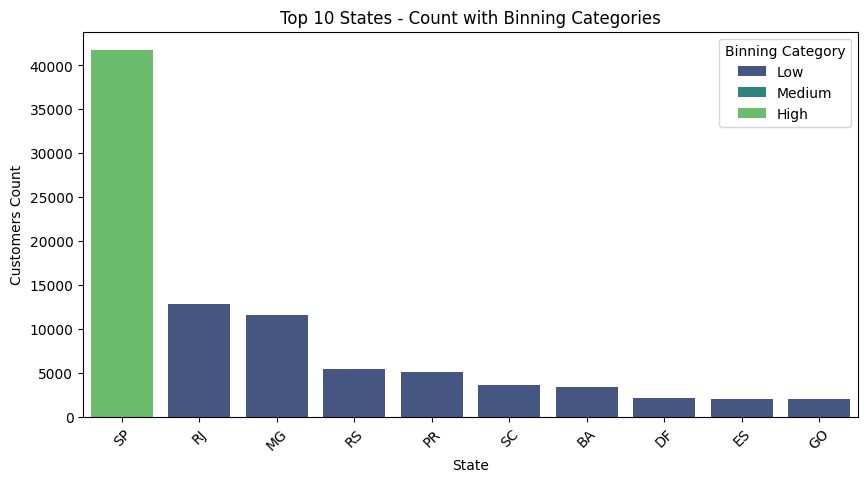

In [143]:
# Mengambil top 10 data dan reset index
top_state = state_distribution.head(10).copy().reset_index(drop=True)

# Plot hasil clustering
plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_state",
    y="count",
    hue="bin_category",
    data=top_state,
    palette="viridis"
)
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Customers Count")
plt.title("Top 10 States - Count with Binning Categories")

# Menampilkan legend dan plot
plt.legend(title="Binning Category")
plt.show()


Visualisasi distribusi pelanggan berdasarkan binning kategori negara bagian

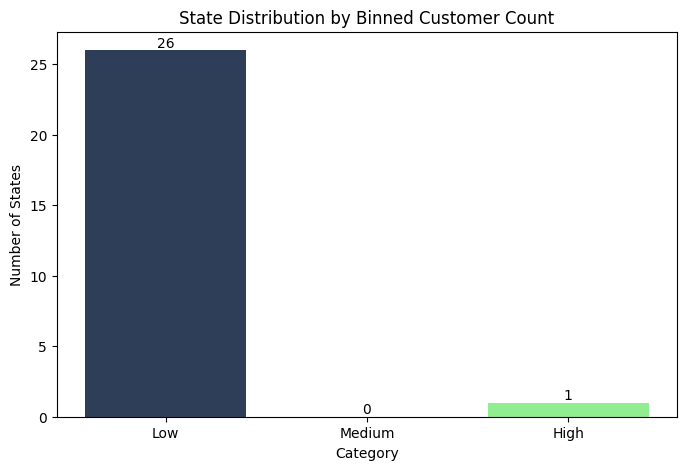

In [141]:
# Visualisasi distribusi pelanggan berdasarkan binning kategori negara bagian
bin_counts_state = state_distribution['bin_category'].value_counts().sort_index()
plt.figure(figsize=(8,5))
bars = plt.bar(bin_counts_state.index, bin_counts_state.values, color=["#2F3E58", "#008080", "lightgreen"])
plt.xlabel("Category")
plt.ylabel("Number of States")
plt.title("State Distribution by Binned Customer Count")

# Menambahkan jumlah data di atas tiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.show()

**Insight:**
- Pada analisis lanjutan saya menerapkan clusstering dengan teknik binning dan membagi pelanggan ke kelas Low, Medium dan High berdasarkan kota dan negara bagian.

## Conclusion

- Conclution pertanyaan 1 <br>
Berdasarkan analisis jumlah pelanggan per kota, kota dengan jumlah pelanggan terbanyak adalah sao paulo dengan 15540 pelanggan. Kota ini memiliki jumlah pelanggan yang jauh lebih tinggi dibandingkan kota-kota lainnya dalam dataset. Hal ini menunjukkan bahwa kota ini kemungkinan besar merupakan pusat ekonomi atau memiliki jumlah penduduk yang lebih besar dibandingkan kota lainnya dalam dataset.

- Conclution pertanyaan 2 <br>
Negara bagian dengan jumlah pelanggan terbanyak adalah SP dengan 41746 pelanggan. Negara bagian ini memiliki jumlah pelanggan yang lebih dominan dibandingkan negara bagian lainnya, yang bisa menunjukkan bahwa wilayah ini memiliki konsentrasi bisnis atau populasi yang lebih tinggi dibandingkan dengan negara bagian lain dalam dataset.